# Imports

In [1]:
import csv
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import json

## Import file desc

In [2]:
with open("trials_3.json") as f:
    trial_desc = json.loads(f.read())
    
#with open("Attempt2/Batch2/Test/map.json") as f:
#    test_desc = {**json.loads(f.read()), **test_desc}
    
#with open("Reanalysis2/train_map.json") as f:
#    train_desc = json.loads(f.read())
    
#with open("Attempt2/Batch2/Train/map.json") as f:
#    train_desc = {**json.loads(f.read()), **train_desc}

In [3]:
trial_desc

{'m1te1a4': {'type': 'circle',
  'trial': 'test',
  'condition': 'long',
  'new': 'TL',
  'old': 'BR',
  'coordinates': {'TL': {'x': 102, 'y': 108, 'r': 46},
   'BR': {'x': 307, 'y': 348, 'r': 43}}},
 'm2te1a4': {'type': 'circle',
  'trial': 'test',
  'condition': 'long',
  'new': 'TL',
  'old': 'BR',
  'coordinates': {'TL': {'x': 101, 'y': 109, 'r': 46},
   'BR': {'x': 306, 'y': 345, 'r': 43}}},
 'm3te1a4': {'type': 'circle',
  'trial': 'test',
  'condition': 'long',
  'new': 'BL',
  'old': 'TR',
  'coordinates': {'TR': {'x': 312, 'y': 116, 'r': 46},
   'BL': {'x': 93, 'y': 340, 'r': 43}}},
 'm4te1a4': {'type': 'circle',
  'trial': 'test',
  'condition': 'long',
  'new': 'BL',
  'old': 'TR',
  'coordinates': {'TR': {'x': 314, 'y': 116, 'r': 46},
   'BL': {'x': 94, 'y': 341, 'r': 43}}},
 'm1t1a4': {'type': 'circle',
  'trial': 'train',
  'condition': 'long',
  'new': 'TR',
  'old': 'BR',
  'coordinates': {'TR': {'x': 316, 'y': 114, 'r': 45},
   'BR': {'x': 307, 'y': 347, 'r': 43}}},
 '

# Helper functions

In [4]:
def to_ms(time_string):
    split = time_string.split(":")
    return int(split[0]) * 60 * 1000 + int(split[1]) * 1000 + int(split[2])
    

In [20]:
def load_file(desc, file, limit=-1):
    durations = {}
    timestamps = {}
    #q_durations = {}
    start = False
    
    df = pd.read_csv("cleaned_timestamps/" + file + ".csv")
    #quadrant_df = pd.read_csv("Reanalysis2/quadrants/" + desc['file'][-8:])
    total_duration = 0
    
    for index, row in df.iterrows():
        
        #print(row['c1'], row['c2'])
        # convert time stamps to ms
        durations.setdefault(row['location'], [])  
        timestamps.setdefault(row['location'], [])

        #if to_ms(row['stop']) - to_ms(row['start']) > 6000:
        #    continue
            
        #if to_ms(row['stop']) - to_ms(row['start']) < 500:
        #    continue
        #    total_duration = 20 * 1000
        #    durations[row['location']].append(20000 - total_duration)
        #    timestamps[row['location']].append(20000 - total_duration)
       #     break
        #if to_ms(row['start']) > 10 * 60 * 1000:
        #    break
        
        if limit != -1 and total_duration + to_ms(row['stop']) - to_ms(row['start']) > limit:
            dur = to_ms(row['stop']) - to_ms(row['start'])
            diff = limit - total_duration

            print(dur, diff, total_duration)
            total_duration = limit
            durations[row['location']].append(diff)
            timestamps[row['location']].append(((to_ms(row['start'])), to_ms(row['start']) + diff))
            break
            
        
        total_duration += to_ms(row['stop']) - to_ms(row['start'])
        durations[row['location']].append(to_ms(row['stop']) - to_ms(row['start']))
        timestamps[row['location']].append((to_ms(row['start']), to_ms(row['stop'])))
    
    
    #for index, row in quadrant_df.iterrows():
        
        #print(row['c1'], row['c2'])
        # convert time stamps to ms
   #     q_durations.setdefault(row['location'], 0)  

    #    q_durations[row['location']] += (to_ms(row['stop']) - to_ms(row['start']))
    
    desc["durations"] = durations
    desc["timestamps"] = timestamps
    total_exploration = 0
    for k in durations:
        if desc["new"] == k:
            new = np.sum(durations[k])
            total_exploration += new
        else:
            old = np.sum(durations[k])
            total_exploration += old

    d = (new-old) / (new + old)
    desc["DI"] = d
    
    desc["total"] = total_exploration
    #desc["q_durations"] = q_durations

# Load Test files

In [21]:
test_desc = {}
for file in trial_desc.keys():
    if trial_desc[file]["trial"] == "test":
        load_file(trial_desc[file], file)
        test_desc[file] = trial_desc[file]

In [22]:
test_desc

{'m1te1a4': {'type': 'circle',
  'trial': 'test',
  'condition': 'long',
  'new': 'TL',
  'old': 'BR',
  'coordinates': {'TL': {'x': 102, 'y': 108, 'r': 46},
   'BR': {'x': 307, 'y': 348, 'r': 43}},
  'durations': {'BR': [1133,
    1667,
    1267,
    1000,
    5600,
    466,
    933,
    2600,
    1533,
    3200,
    2933,
    3200,
    934,
    200,
    534,
    1534,
    1733,
    600,
    533,
    3000,
    200,
    2133,
    733],
   'TL': [5800,
    5000,
    1000,
    3333,
    1267,
    867,
    2200,
    2667,
    134,
    5800,
    600,
    1400,
    733,
    533,
    400,
    1000,
    400,
    466,
    733,
    533,
    1133,
    3134,
    1800,
    334,
    1467,
    3533,
    600,
    2066]},
  'timestamps': {'BR': [(11800, 12933),
    (46466, 48133),
    (50133, 51400),
    (51533, 52533),
    (54066, 59666),
    (62400, 62866),
    (62933, 63866),
    (192866, 195466),
    (202600, 204133),
    (225400, 228600),
    (246800, 249733),
    (311000, 314200),
    (316466, 3

In [23]:
train_desc = {}
for file in trial_desc.keys():
    if trial_desc[file]["trial"] == "train":
        load_file(trial_desc[file], file)
        train_desc[file] = trial_desc[file]
train_desc

{'m1t1a4': {'type': 'circle',
  'trial': 'train',
  'condition': 'long',
  'new': 'TR',
  'old': 'BR',
  'coordinates': {'TR': {'x': 316, 'y': 114, 'r': 45},
   'BR': {'x': 307, 'y': 347, 'r': 43}},
  'durations': {'TR': [667,
    800,
    1334,
    7000,
    2266,
    3467,
    667,
    800,
    2600,
    933,
    733,
    600,
    534,
    334,
    3467,
    934,
    1000,
    3867,
    133,
    400,
    67,
    467,
    266,
    733,
    533,
    600,
    267,
    733,
    1733,
    200,
    400,
    467,
    534,
    133,
    600,
    533,
    400,
    3000,
    2000],
   'BR': [600,
    2800,
    1600,
    866,
    6133,
    4200,
    2000,
    1800,
    2800,
    1733,
    1867,
    734,
    1066,
    1934,
    1000,
    600,
    667,
    1666,
    1267,
    400,
    2066,
    800,
    600,
    1267,
    3400,
    1200,
    533,
    333,
    400,
    1600,
    4200,
    266,
    467,
    267,
    266,
    400,
    1067,
    3133,
    1333,
    3733,
    267,
    200,
    400,
   

      condition        DI  mouse  familiar   novel
0  20 min train -0.267408      1    79.931  46.202
1  20 min train -0.098111      3    64.536  53.004
2  20 min train -0.092601      4    43.267  35.933
3  20 min train -0.015396      2    61.534  59.668
4   20 min test  0.130105      1    37.666  48.933
5   20 min test  0.349960      4    17.398  36.131
6   20 min test  0.363806      2    14.865  31.866
7   20 min test  0.444315      3    20.467  53.197
[[-1.11022302e-16 -2.67408212e-01]
 [-1.11022302e-16 -9.81112813e-02]
 [-2.98567855e-02 -9.26010101e-02]
 [-1.11022302e-16 -1.53957855e-02]]
[[1.         0.13010543]
 [1.         0.34995983]
 [0.97995567 0.36380561]
 [1.         0.44431473]]
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
Name: mouse, dtype: bool
Empty DataFrame
Columns: [condition, DI, mouse, familiar, novel]
Index: []


IndexError: single positional indexer is out-of-bounds

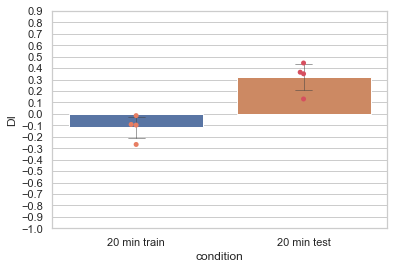

In [28]:
# sort short and long

rows_list = []
for file in test_desc:
    
    new = test_desc[file]["new"]
    old = test_desc[file]["old"]

    mouse = int(file[1])
    #epoch = int(test_desc[file]["trial"][3])
    condition = "3 min test" if test_desc[file]["condition"] == "short" else "20 min test"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": test_desc[file]["DI"],"mouse": mouse, "familiar": np.sum(test_desc[file]["durations"][old]) / 1000, "novel": np.sum(test_desc[file]["durations"][new]) / 1000})

for file in train_desc:
    
    new = train_desc[file]["new"]
    old = train_desc[file]["old"]
    mouse = int(file[1])

    #epoch = int(test_desc[file]["trial"][3])
    condition = "3 min train" if train_desc[file]["condition"] == "short" else "20 min train"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": train_desc[file]["DI"], "mouse": mouse, "familiar": np.sum(train_desc[file]["durations"][old]) / 1000, "novel": np.sum(train_desc[file]["durations"][new]) / 1000})

test_df = pd.DataFrame(rows_list)
test_df = test_df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.batch == 1].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


test_df = test_df.reset_index(drop=True)



fig, ax = plt.subplots()

print(test_df)
sns.set(style="whitegrid")

sns.swarmplot(x="condition", y="DI", data=test_df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))

#sns.barplot()
sns.barplot(x="condition", y="DI", data=test_df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")
ax.set_yticks(np.arange(-1, 1, step=0.1))



idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
print(locs1)
print(locs2)

for i in range(0,3):
    x = [0, 1]
    print(test_df["mouse"] == i)
    temp_df = test_df.loc[test_df["mouse"] == i]
    print(temp_df)
    y = [round(temp_df.iloc[0]["DI"], 8), round(temp_df.iloc[1]["DI"], 8)]
    ax.plot(x, y, color="black", alpha=0.1)
    
    #x = [2, 3]
    #temp_df = test_df.loc[test_df["mouse"] == i]
    #y = [round(temp_df.iloc[2]["DI"], 8), round(temp_df.iloc[3]["DI"], 8)]
    #ax.plot(x, y, color="black", alpha=0.1)

#for i in range(locs1.shape[0]):
    
    # find locs1
    #mouse = test_df.iloc[i + 8]["mouse"]
    #if mouse in [1,4,5,8]:
    #    continue
    #index = test_df.loc[test_df['mouse'] == mouse].index[0]
    #x = [locs1[index ,0], locs2[i, 0]]
    #y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    #ax.plot(x, y, color="black", alpha=0.1)

#for i in range(locs1.shape[0]):
#    x = [locs1[i, 0], locs2_sorted[i, 0]]
#    y = [locs1[i, 1], locs2_sorted[i, 1]]
#    ax.plot(x, y, color="black", alpha=0.1)

#plt.show()
fig.tight_layout()
plt.savefig('output_DI.png', dpi=300)

In [131]:
rows_list = []
for file in test_desc:
    #epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "test DI": test_desc[file]["DI"], "duration": test_desc[file]["total"] / 1000})

i = 0
for file in train_desc:
    
    rows_list[i]["train DI"] = train_desc[file]["DI"]
    i += 1
    
#for file in train_desc
df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "duration"], ascending = (False, True))
df = df.reset_index(drop=True)
df

,condition,test DI,duration,train DI
0,3 min,0.161062,27.356,-0.158014
1,3 min,-0.179031,43.797,0.262637
2,3 min,-0.128686,60.869,-0.769810
3,3 min,0.040817,63.454,-0.248324
4,20 min,0.396945,18.330,-0.056803
5,20 min,0.141924,40.437,0.094891
6,20 min,0.042939,48.837,0.137677
7,20 min,0.169258,65.344,-0.344442


    condition        DI  mouse  duration    object
0       3 min -0.128686      5     0.769  familiar
1       3 min -0.128686      5     3.149  familiar
2       3 min -0.128686      5     4.128  familiar
3       3 min -0.128686      5     1.749  familiar
4       3 min -0.128686      5     0.910  familiar
..        ...       ...    ...       ...       ...
205     3 min  0.040817      8     1.120     novel
206     3 min  0.040817      8     2.868     novel
207     3 min  0.040817      8     2.029     novel
208     3 min  0.040817      8     1.189     novel
209     3 min  0.040817      8     2.239     novel

[210 rows x 5 columns]


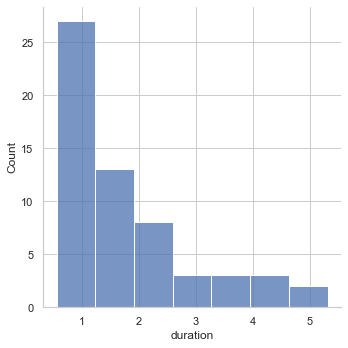

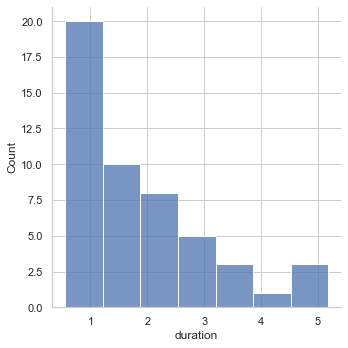

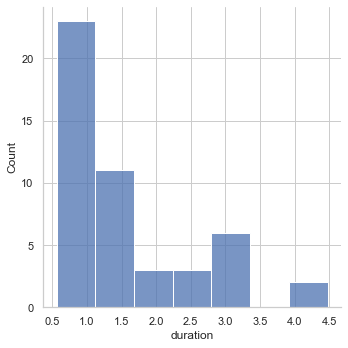

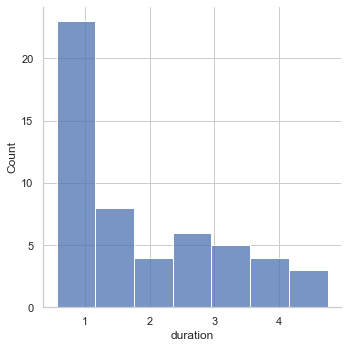

In [132]:
rows_list = []
for file in test_desc:
    
    new = test_desc[file]["new"]
    old = test_desc[file]["old"]
    
    #epoch = int(train_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(train_desc[file]["trial"][1]) < 5 else 2
    
    for duration in test_desc[file]["durations"][old]:
        rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "mouse": int(file[1]), "duration": duration/1000, "object": "familiar"})
    
    for duration in test_desc[file]["durations"][new]:
        rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "mouse": int(file[1]), "duration": duration/1000, "object": "novel" })

    
df = pd.DataFrame(rows_list)
#df = df.sort_values(["condition", "duration"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)
print(df)
sns.displot(data=df[(df["condition"] == "3 min") & (df["object"] == "familiar")], x="duration")
sns.displot(data=df[(df["condition"] == "3 min") & (df["object"] == "novel")], x="duration")
sns.displot(data=df[(df["condition"] == "20 min") & (df["object"] == "familiar")], x="duration")
sns.displot(data=df[(df["condition"] == "20 min") & (df["object"] == "novel")], x="duration")

# Train analysis

## Analysis of exploration duration between 3 mins and 20 mins

In [20]:
# Transform to datatable
rows_list = []
for file in train_desc:
    
    epoch = int(train_desc[file]["trial"][3])
    condition = "3 min" if train_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(train_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": train_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1]), "exploration": train_desc[file]["total"]/1000 })

exploration_df = pd.DataFrame(rows_list)
exploration_df = exploration_df.sort_values(["condition", "exploration"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


exploration_df = exploration_df.reset_index(drop=True)

In [21]:
exploration_df

,condition,DI,epoch,batch,mouse,exploration
0,3 min,0.588300,1,2,6,8.239
1,3 min,0.834437,2,1,4,9.664
2,3 min,0.724681,2,1,3,11.503
3,3 min,0.382470,2,2,8,16.064
4,3 min,0.467520,1,1,2,16.256
5,3 min,0.477623,2,2,7,21.071
6,3 min,0.401899,1,2,5,25.280
7,3 min,0.916504,1,1,1,87.753
8,20 min,0.406288,1,2,7,31.933
9,20 min,0.631064,2,1,2,39.248


<AxesSubplot:xlabel='condition', ylabel='exploration'>

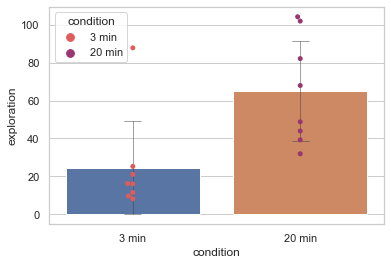

In [24]:
sns.set(style="whitegrid")
sns.barplot(x="condition", y="exploration", data=exploration_df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="condition", y="exploration",hue="condition", data=exploration_df, palette=sns.color_palette("flare", 2))


Observations: 
Avg exploration 
- 60s for 20 min exploration
- 20s for 3 min exploration
Notes: 
- previous research found 30s for 10 min exploration with different strain of mice
- problem: large variance in exploration in condition, previous found 0 - 60s exploration in 10 min, here 33 - 100s for 20 min and 10-25s for 3 min (90s outlier?)
May need to rescore with looser threshold: 2 cm nose directed towards object
"Climbing onto the object (unless the mouse sniffs the object it has climbed on) or chewing the object does not qualify as exploration"

## Analysis of exploration duration between Top and Bottom objects

### Plot comparison of 20 and 3 min together

In [25]:
# Transform to datatable
rows_list = []
for file in train_desc:
    
    epoch = int(train_desc[file]["trial"][3])
    condition = "3 min" if train_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(train_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "object":"TL", "DI": train_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1]), "exploration": np.sum(train_desc[file]["durations"]["TL"])/1000 })
    rows_list.append({"condition": condition, "object":"BL", "DI": train_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1]), "exploration": np.sum(train_desc[file]["durations"]["BL"]) /1000 })

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["object", "exploration"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

In [26]:
df

,condition,object,DI,epoch,batch,mouse,exploration
0,3 min,TL,0.834437,2,1,4,1.600
1,3 min,TL,0.724681,2,1,3,3.167
2,3 min,TL,0.588300,1,2,6,4.847
3,3 min,TL,0.467520,1,1,2,7.600
4,3 min,TL,0.382470,2,2,8,9.920
5,3 min,TL,0.401899,1,2,5,10.160
6,3 min,TL,0.477623,2,2,7,11.007
7,20 min,TL,0.406288,1,2,7,12.974
8,20 min,TL,0.631064,2,1,2,14.480
9,20 min,TL,0.351161,1,2,8,17.137


<AxesSubplot:xlabel='object', ylabel='exploration'>

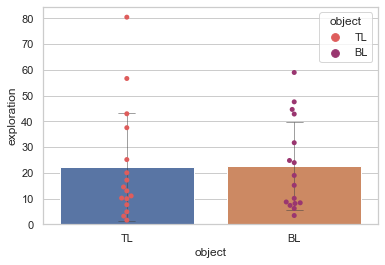

In [31]:
sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="object", y="exploration",hue="object", data=df, palette=sns.color_palette("flare", 2))

### Plot separately 3 min and 20 min condition

<AxesSubplot:xlabel='object', ylabel='exploration'>

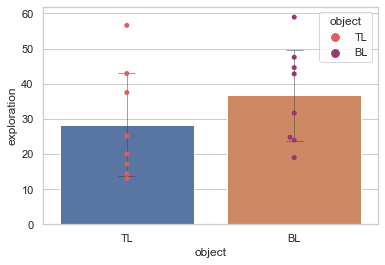

In [29]:
# 20 min
short_df = df.drop(df[df.condition == "3 min"].index)

sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=short_df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="object", y="exploration",hue="object", data=short_df, palette=sns.color_palette("flare", 2))


<AxesSubplot:xlabel='object', ylabel='exploration'>

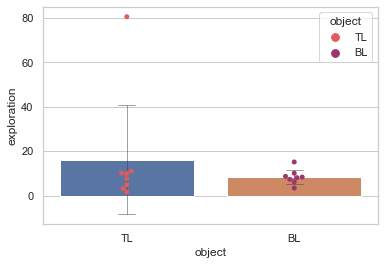

In [30]:
# 20 min
long_df = df.drop(df[df.condition == "20 min"].index)

sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=long_df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="object", y="exploration",hue="object", data=long_df, palette=sns.color_palette("flare", 2))


### Plot ratio of top to bottom object (same as DI calculation but not between new/old)

In [43]:
# Transform to datatable
rows_list = []
for file in train_desc:
    
    epoch = int(train_desc[file]["trial"][3])
    condition = "3 min" if train_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(train_desc[file]["trial"][1]) < 5 else 2
    ratio = np.sum(train_desc[file]["durations"]["TL"]) / train_desc[file]["total"]
    rows_list.append({"condition": condition, "ratio": ratio, "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1])})

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "ratio"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

In [44]:
df

,condition,ratio,epoch,batch,mouse
0,3 min,0.165563,2,1,4
1,3 min,0.275319,2,1,3
2,3 min,0.401899,1,2,5
3,3 min,0.467520,1,1,2
4,3 min,0.522377,2,2,7
5,3 min,0.588300,1,2,6
6,3 min,0.617530,2,2,8
7,3 min,0.916504,1,1,1
8,20 min,0.351161,1,2,8
9,20 min,0.368936,2,1,2


<AxesSubplot:xlabel='condition', ylabel='ratio'>

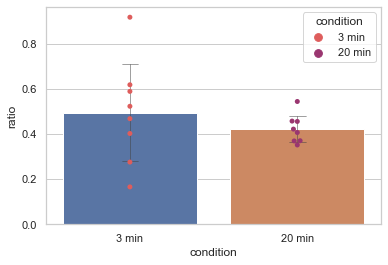

In [45]:
sns.set(style="whitegrid")
sns.barplot(x="condition", y="ratio", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="condition", y="ratio",hue="condition", data=df, palette=sns.color_palette("flare", 2))

Observations:
- Exploration relatively equal between TL and BL objects, suggests no innate preference for either object or location
- Same for 3 min and 20 min conditions
- Some outliers
- Notably for 3 min exploration: outliers in exploration ratio between top and bottom object but no observable bias

## Analysis of discrimination index

### Plot of average DI

In [37]:
rows_list = []
for file in train_desc:
    
    epoch = int(train_desc[file]["trial"][3])
    condition = "3 min" if train_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(train_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": "1", "DI": train_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1]) })

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

In [38]:
df

,condition,DI,epoch,batch,mouse
0,1,0.351161,1,2,8
1,1,0.382470,2,2,8
2,1,0.401899,1,2,5
3,1,0.406288,1,2,7
4,1,0.455270,1,1,3
5,1,0.467520,1,1,2
6,1,0.477623,2,2,7
7,1,0.543181,2,2,5
8,1,0.543558,1,1,4
9,1,0.578703,2,1,1


<AxesSubplot:xlabel='condition', ylabel='DI'>

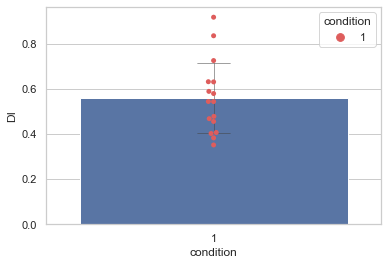

In [39]:
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="condition", y="DI",hue="condition", data=df, palette=sns.color_palette("flare", 2))

<AxesSubplot:xlabel='condition', ylabel='DI'>

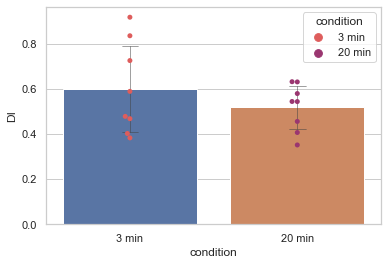

In [41]:
rows_list = []
for file in train_desc:
    
    epoch = int(train_desc[file]["trial"][3])
    condition = "3 min" if train_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(train_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": train_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1]) })

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="condition", y="DI",hue="condition", data=df, palette=sns.color_palette("flare", 2))

### Plot of DI vs time in video

<AxesSubplot:xlabel='time', ylabel='DI'>

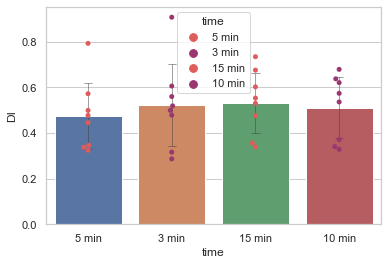

In [15]:
# time stamps: 3 min, 5 min, 10 min, 15, min, 20 min

row_list = []
for file in train_desc:
    
    if train_desc[file]["condition"] == "long":
        
        new = train_desc[file]["new"]
        old = train_desc[file]["old"]

        new_t = 0
        old_t = 0
        
        for time in train_desc[file]["timestamps"][new]:
            if time[1] < 3 * 60 * 1000:
                new_t += time[1] - time[0]

        for time in train_desc[file]["timestamps"][old]:
            if time[1] < 3 * 60 * 1000:
                old_t += time[1] - time[0]
        
        row_list.append({"time": "3 min", "DI": new_t/(old_t + new_t)})
        
        new_t = 0
        old_t = 0
        
        for time in train_desc[file]["timestamps"][new]:
            if time[1] < 5 * 60 * 1000:
                new_t += time[1] - time[0]

        for time in train_desc[file]["timestamps"][old]:
            if time[1] < 5 * 60 * 1000:
                old_t += time[1] - time[0]
        
        row_list.append({"time": "5 min", "DI": new_t/(old_t + new_t)})
        
        new_t = 0
        old_t = 0
        
        for time in train_desc[file]["timestamps"][new]:
            if time[1] < 10 * 60 * 1000:
                new_t += time[1] - time[0]

        for time in train_desc[file]["timestamps"][old]:
            if time[1] < 10 * 60 * 1000:
                old_t += time[1] - time[0]
        
        row_list.append({"time": "10 min", "DI": new_t/(old_t + new_t)})
        
        new_t = 0
        old_t = 0
        
        for time in train_desc[file]["timestamps"][new]:
            if time[1] < 15. *60 * 1000:
                new_t += time[1] - time[0]

        for time in train_desc[file]["timestamps"][old]:
            if time[1] < 15 * 60 * 1000:
                old_t += time[1] - time[0]
        
        row_list.append({"time": "15 min", "DI": new_t/(old_t + new_t)})
        
    
df = pd.DataFrame(row_list)
df = df.sort_values(["time", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)
sns.set(style="whitegrid")
sns.barplot(x="time", y="DI", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="time", y="DI",hue="time", data=df, palette=sns.color_palette("flare", 2))

Observation
- Bias towards new object (even though it is balanced)
- When split between 3 and 20 min, 20 min is nicely grouped while 3 min is biased to new object
- Suggests DI bias is just by chance, since Top and Bottom object unbiased
- Can try to adjust exploration scoring which may be too strict and results in a higher variance in 3 min (time limited), while 20 min averages out

## Analysis of exploration distribution

### Plot of total exploration duration histogram

In [98]:
rows_list = []
for file in train_desc:
    
    #epoch = int(train_desc[file]["trial"][3])
    condition = "3 min" if train_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(train_desc[file]["trial"][1]) < 5 else 2
    
    for duration in train_desc[file]["durations"]["TL"]:
        rows_list.append({"condition": condition, "DI": train_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1]), "duration": duration/1000 })
    
    for duration in train_desc[file]["durations"]["BL"]:
        rows_list.append({"condition": condition, "DI": train_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(train_desc[file]["trial"][1]), "duration": duration/1000 })

    
df = pd.DataFrame(rows_list)
#df = df.sort_values(["condition", "duration"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)
sns.displot(data=df, x="duration")


KeyError: 'TL'

In [54]:
df

,condition,DI,epoch,batch,mouse,duration
0,3 min,0.401899,1,2,5,6.432
1,3 min,0.401899,1,2,5,0.368
2,3 min,0.401899,1,2,5,0.640
3,3 min,0.401899,1,2,5,2.720
4,3 min,0.401899,1,2,5,0.320
...,...,...,...,...,...,...
380,3 min,0.834437,2,1,4,1.408
381,3 min,0.834437,2,1,4,2.128
382,3 min,0.834437,2,1,4,0.960
383,3 min,0.834437,2,1,4,2.688


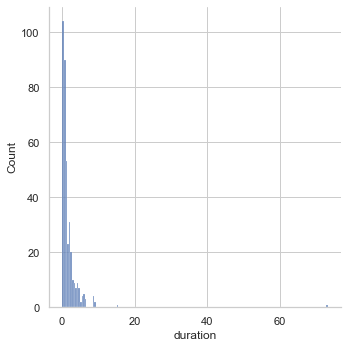

In [55]:
sns.displot(data=df, x="duration")


### Plot of average exploration duration across train sessions

In [ ]:
# Use matlab histcounts to setup bins, mean + std dev

### Plot of average exploration duration for 3 mins and 20 mins

# Test analysis

## Analysis of exploration duration between 3 min and 20 mins

In [212]:
# Transform to datatable
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "exploration": test_desc[file]["total"]/1000 })

df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "exploration"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

In [213]:
df

,condition,DI,epoch,batch,mouse,exploration
0,3 min,0.599066,2,1,3,17.352
1,3 min,0.605649,2,2,7,18.552
2,3 min,0.178684,1,2,6,18.793
3,3 min,0.269104,1,1,1,18.870
4,3 min,0.794287,2,2,8,19.430
5,3 min,0.478521,1,2,5,19.554
6,3 min,0.920907,1,1,2,19.711
7,3 min,0.833726,2,1,4,19.949
8,20 min,0.853921,2,1,2,14.232
9,20 min,0.641509,2,1,1,15.953


<AxesSubplot:xlabel='condition', ylabel='exploration'>

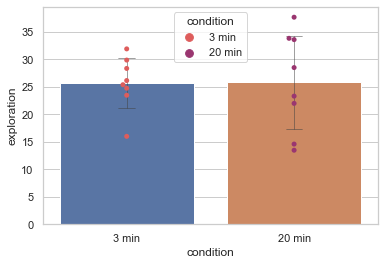

In [10]:
sns.set(style="whitegrid")
sns.barplot(x="condition", y="exploration", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="condition", y="exploration",hue="condition", data=df, palette=sns.color_palette("flare", 2))


Observations:
- Around 20s of exploration on avg for both conditions (5 mins)
- No difference in total exploration -> longer vs shorter exposure has no effect on total exploration
- Variance similar for both: 10-27s for 3 min and 10-30s for 20 min

## Analysis of exploration duration between Top and Bottom objects

### Plot comparison of 20 and 3 min together

In [11]:
# Transform to datatable
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    for location in test_desc[file]["durations"]:
        if location[0] == "T":
            rows_list.append({"condition": condition, "object":"Top", "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "exploration": np.sum(test_desc[file]["durations"][location])/1000 })
            
        else:
            rows_list.append({"condition": condition, "object":"Bottom", "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "exploration": np.sum(test_desc[file]["durations"][location]) /1000 })

    
    

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["object", "exploration"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

In [12]:
df

,condition,object,DI,epoch,batch,mouse,exploration
0,20 min,Top,0.866474,2,1,2,1.799
1,3 min,Top,0.826762,2,1,4,4.398
2,20 min,Top,0.788984,2,2,5,4.919
3,3 min,Top,0.462520,1,2,5,7.398
4,3 min,Top,0.304303,1,1,1,7.956
5,3 min,Top,0.381604,1,2,6,8.957
6,3 min,Top,0.681754,2,2,8,10.153
7,20 min,Top,0.756151,1,1,3,11.033
8,20 min,Top,0.666637,2,1,1,11.197
9,3 min,Top,0.614450,2,2,7,11.516


<AxesSubplot:xlabel='object', ylabel='exploration'>

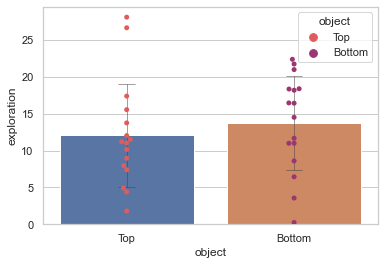

In [13]:
sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="object", y="exploration",hue="object", data=df, palette=sns.color_palette("flare", 2))

### Plot separately 3 min and 20 min condition

<AxesSubplot:xlabel='object', ylabel='exploration'>

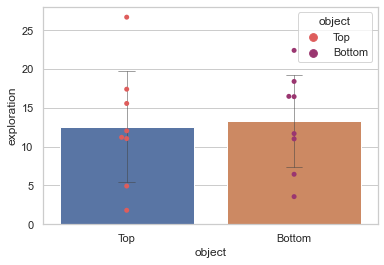

In [14]:
# 20 min
short_df = df.drop(df[df.condition == "3 min"].index)

sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=short_df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="object", y="exploration",hue="object", data=short_df, palette=sns.color_palette("flare", 2))


<AxesSubplot:xlabel='object', ylabel='exploration'>

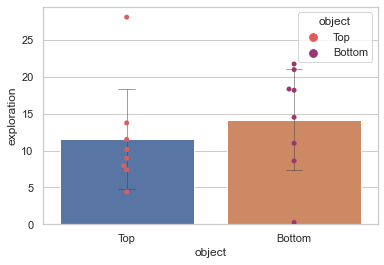

In [15]:
# 20 min
long_df = df.drop(df[df.condition == "20 min"].index)

sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=long_df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="object", y="exploration",hue="object", data=long_df, palette=sns.color_palette("flare", 2))


### Plot ratio of top to bottom object

In [16]:
# Transform to datatable
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    
    for location in test_desc[file]["durations"]:
        if location[0] == "T":
            ratio = np.sum(test_desc[file]["durations"][location]) / test_desc[file]["total"]
    rows_list.append({"condition": condition, "ratio": ratio, "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "ratio"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

<AxesSubplot:xlabel='condition', ylabel='ratio'>

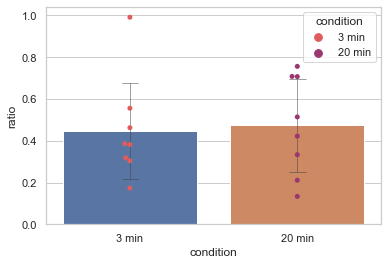

In [17]:
sns.set(style="whitegrid")
sns.barplot(x="condition", y="ratio", data=df, errwidth=0.5, capsize=0.1, ci="sd")
sns.swarmplot(x="condition", y="ratio",hue="condition", data=df, palette=sns.color_palette("flare", 2))

Observations:
- Average exploration relatively same for Top and Bottom objects when compared together and separately
- Variance in exploration durations similar for Top and Bottom similar for both conditions
- Ratio also around 0.5 with large variance
- Notably concentration around 0.4 for 3 min condition while 20 min is more spread out
- Does not seem to be an inherent bias for object preference in 5 min condition, however why does 3 min prefer the bottom slightly more? Is it due to scoring issues, temporal issues?

## Analysis of discrimination index

### Plot of exploration of new vs old

In [9]:
# Transform to datatable
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2

    rows_list.append({"condition": condition, "object":"Novel", "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "exploration": np.sum(test_desc[file]["durations"][test_desc[file]["new"]])/1000 })

    rows_list.append({"condition": condition, "object":"Familiar", "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "exploration": np.sum(test_desc[file]["durations"][test_desc[file]["old"]]) /1000 })

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["object", "exploration"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

In [10]:
df

,condition,object,DI,epoch,batch,mouse,exploration
0,3 min,Novel,0.290969,1,1,1,8.876
1,3 min,Novel,0.467056,1,2,5,9.357
2,3 min,Novel,0.354727,1,2,6,10.595
3,20 min,Novel,0.853921,2,1,2,12.153
4,20 min,Novel,0.764011,1,1,3,13.073
5,3 min,Novel,0.542749,2,1,3,16.232
6,20 min,Novel,0.650217,1,2,7,18.433
7,3 min,Novel,0.591593,2,2,7,19.632
8,20 min,Novel,0.467314,1,2,8,20.273
9,20 min,Novel,0.543513,2,2,6,20.991


   condition    object        DI  epoch  batch  mouse  exploration
31    20 min  Familiar  0.467314      1      2      8       23.109
28    20 min  Familiar  0.543513      2      2      6       17.630
24    20 min  Familiar  0.633358      2      1      1       13.517
21    20 min  Familiar  0.650217      1      2      7        9.916
27    20 min  Familiar  0.671750      1      1      4       14.595
19    20 min  Familiar  0.746537      2      2      5        7.154
18    20 min  Familiar  0.764011      1      1      3        4.038
17    20 min  Familiar  0.853921      2      1      2        2.079
8     20 min     Novel  0.467314      1      2      8       20.273
9     20 min     Novel  0.543513      2      2      6       20.991
11    20 min     Novel  0.633358      2      1      1       23.350
6     20 min     Novel  0.650217      1      2      7       18.433
14    20 min     Novel  0.671750      1      1      4       29.868
10    20 min     Novel  0.746537      2      2      5       21

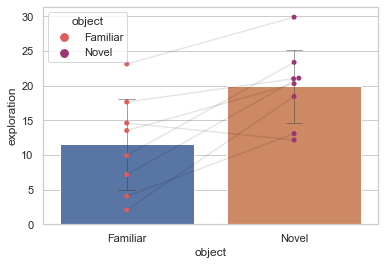

In [18]:
# 20 min
short_df = df.drop(df[df.condition == "3 min"].index)
short_df = short_df.sort_values(["object", "DI"], ascending = (True, True))
print(short_df)
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


short_df = short_df.reset_index(drop=True)

fig, ax = plt.subplots()


sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=short_df, errwidth=0.5, capsize=0.1, ci="sd", ax=ax)
sns.swarmplot(x="object", y="exploration",hue="object", data=short_df, palette=sns.color_palette("flare", 2), ax=ax)


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = short_df.iloc[i + 8]["mouse"]
    index = short_df.loc[test_df['mouse'] == mouse].index[0]
    x = [locs1[index ,0], locs2[i, 0]]
    y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    ax.plot(x, y, color="black", alpha=0.1)

   condition    object        DI  epoch  batch  mouse  exploration
30     3 min  Familiar  0.290969      1      1      1       21.629
29     3 min  Familiar  0.354727      1      2      6       19.273
22     3 min  Familiar  0.467056      1      2      5       10.677
26     3 min  Familiar  0.542749      2      1      3       13.675
25     3 min  Familiar  0.591593      2      2      7       13.553
23     3 min  Familiar  0.665225      2      2      8       12.073
20     3 min  Familiar  0.729710      2      1      4        9.315
16     3 min  Familiar  0.956136      1      1      2        1.559
0      3 min     Novel  0.290969      1      1      1        8.876
2      3 min     Novel  0.354727      1      2      6       10.595
1      3 min     Novel  0.467056      1      2      5        9.357
5      3 min     Novel  0.542749      2      1      3       16.232
7      3 min     Novel  0.591593      2      2      7       19.632
12     3 min     Novel  0.665225      2      2      8       23

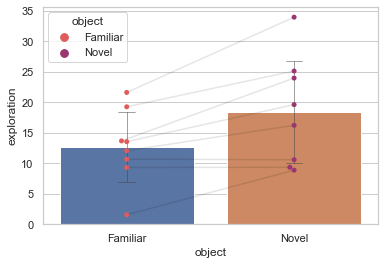

In [17]:
# 20 min
short_df = df.drop(df[df.condition == "20 min"].index)
short_df = short_df.sort_values(["object", "DI"], ascending = (True, True))
print(short_df)
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


short_df = short_df.reset_index(drop=True)

fig, ax = plt.subplots()


sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration", data=short_df, errwidth=0.5, capsize=0.1, ci="sd", ax=ax)
sns.swarmplot(x="object", y="exploration",hue="object", data=short_df, palette=sns.color_palette("flare", 2), ax=ax)


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = short_df.iloc[i + 8]["mouse"]
    index = short_df.loc[test_df['mouse'] == mouse].index[0]
    x = [locs1[index ,0], locs2[i, 0]]
    y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    ax.plot(x, y, color="black", alpha=0.1)

### Plot of average DI

   condition        DI  epoch  batch  mouse
0      3 min  0.290969      1      1      1
1      3 min  0.354727      1      2      6
2      3 min  0.467056      1      2      5
3      3 min  0.542749      2      1      3
4      3 min  0.591593      2      2      7
5      3 min  0.665225      2      2      8
6      3 min  0.729710      2      1      4
7      3 min  0.956136      1      1      2
8     20 min  0.467314      1      2      8
9     20 min  0.543513      2      2      6
10    20 min  0.633358      2      1      1
11    20 min  0.650217      1      2      7
12    20 min  0.671750      1      1      4
13    20 min  0.746537      2      2      5
14    20 min  0.764011      1      1      3
15    20 min  0.853921      2      1      2


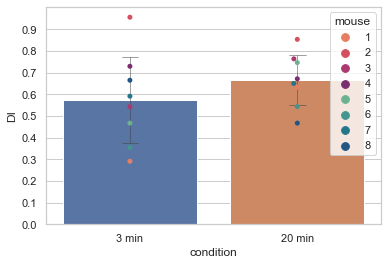

In [123]:
# sort short and long

rows_list = []
for file in test_desc:
    
    
    #if test_desc[file]["old"] == "TL":
        #continue
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)



fig, ax = plt.subplots()

print(df)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

sns.swarmplot(x="condition", y="DI", hue="mouse", data=df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))
#sns.barplot()
ax.set_yticks(np.arange(0, 1, step=0.1))


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()



  condition        DI  epoch  batch  mouse
0     3 min  0.542749      2      1      3
1     3 min  0.591593      2      2      7
2     3 min  0.665225      2      2      8
3     3 min  0.729710      2      1      4
4    20 min  0.543513      2      2      6
5    20 min  0.633358      2      1      1
6    20 min  0.746537      2      2      5
7    20 min  0.853921      2      1      2


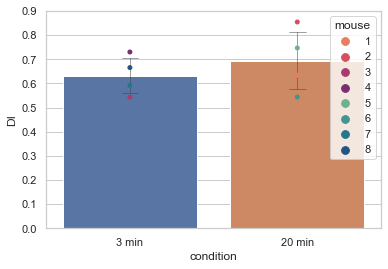

In [77]:
# sort short and long

rows_list = []
for file in test_desc:
    
    
    if test_desc[file]["old"] == "BL":
        continue
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)



fig, ax = plt.subplots()

print(df)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

sns.swarmplot(x="condition", y="DI", hue="mouse", data=df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))
#sns.barplot()
ax.set_yticks(np.arange(0, 1, step=0.1))


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()



In [223]:
# Stats
short = test_df[test_df["condition"] == "3 min"].iloc[:,1].tolist()
long = test_df[test_df["condition"] == "20 min"].iloc[:,1].tolist()

print(stats.ttest_ind(short, long))
print(stats.ttest_1samp(short, 0.5))
print(stats.ttest_1samp(long, 0.5))

Ttest_indResult(statistic=-1.646399972470572, pvalue=0.12560012111521762)
Ttest_1sampResult(statistic=0.3358567323804856, pvalue=0.7484123303049681)
Ttest_1sampResult(statistic=3.493039086143981, pvalue=0.012935415155382761)


Observations:
- Very robust change in exploration for 20 min condition for novel object. 6/8 mice show large increase in exploration of novel object
- Also slight increase in novel object exploration for 3 min condition. 7/8 mice show small increase in exploration
- In terms of DI, higher DI for 20 min however wide variance, especially for 3 min condition
- DI is not significant for 20 vs 3 min condition
- DI is significant (P < 0.05) for 20 min condition in 1 sample t-test vs avg 0.5, but not for 3 min condition
- Data is there -> noisy, need to clean up

# Analysis for data cleanup

## Normalized DI

Normalization formula:

DI_train - 0.5 + DI_test

- If DI_train = 0.5, then no modification
- If DI_train > 0.5, then there is higher exploration of the novel object, would expect more exploration of familiar object so add difference to offset
- If DI_train < 0.5, then there is higher exploration of familiar object, would expect more exploration of novel so subtract difference to offset

In [111]:
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    test_DI = test_desc[file]["DI"]
    train_DI = train_desc[test_desc[file]["trial"]]["DI"]
    
    normalized_DI = test_DI - (train_DI - 0.5)
    
    rows_list.append({"condition": condition, "test DI": test_DI, "train DI": train_DI, "norm DI": normalized_DI,  "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "test DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

In [112]:
df

,condition,test DI,train DI,norm DI,epoch,batch,mouse
0,3 min,0.335788,0.916504,-0.080716,1,1,1
1,3 min,0.347046,0.588300,0.258746,1,2,6
2,3 min,0.354610,0.724681,0.129929,2,1,3
3,3 min,0.422211,0.401899,0.520313,1,2,5
4,3 min,0.642948,0.477623,0.665325,2,2,7
5,3 min,0.666251,0.382470,0.783781,2,2,8
6,3 min,0.841696,0.834437,0.507258,2,1,4
7,3 min,0.975845,0.467520,1.008326,1,1,2
8,20 min,0.471380,0.351161,0.620220,1,2,8
9,20 min,0.509677,0.630159,0.379519,2,2,6


Text(0.5, 1.0, 'correlation 20 min')

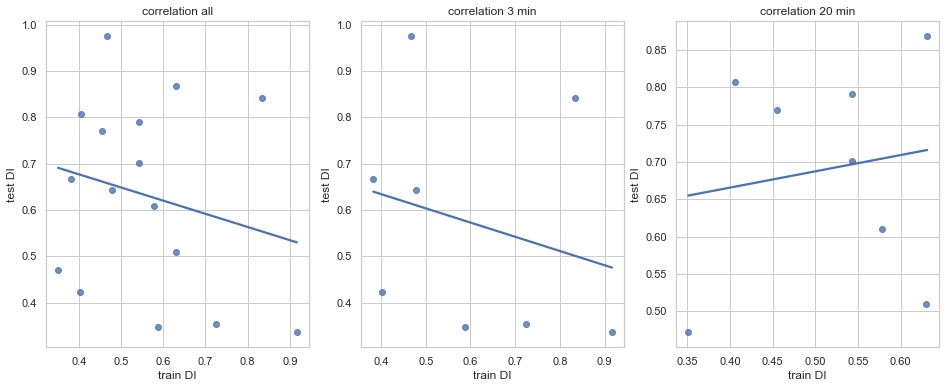

In [129]:
# Plot correlation
fig, axes = plt.subplots(1,3, figsize=(16, 6))

sns.regplot(y="test DI", x="train DI", data=df, ax=axes[0], ci=None)
axes[0].set_title("correlation all")
sns.regplot(y="test DI", x="train DI", data=df[df["condition"] == "3 min"], ax=axes[1], ci=None)
axes[1].set_title("correlation 3 min")

sns.regplot(y="test DI", x="train DI", data=df[df["condition"] == "20 min"], ax=axes[2], ci=None)
axes[2].set_title("correlation 20 min")



   condition   test DI  train DI  epoch  batch  mouse
0      3 min  0.335788  0.916504      1      1      1
1      3 min  0.347046  0.588300      1      2      6
2      3 min  0.354610  0.724681      2      1      3
3      3 min  0.422211  0.401899      1      2      5
4      3 min  0.642948  0.477623      2      2      7
5      3 min  0.666251  0.382470      2      2      8
6      3 min  0.841696  0.834437      2      1      4
7      3 min  0.975845  0.467520      1      1      2
8     20 min  0.471380  0.351161      1      2      8
9     20 min  0.509677  0.630159      2      2      6
10    20 min  0.609825  0.578703      2      1      1
11    20 min  0.701522  0.543558      1      1      4
12    20 min  0.770299  0.455270      1      1      3
13    20 min  0.790566  0.543181      2      2      5
14    20 min  0.807523  0.406288      1      2      7
15    20 min  0.868881  0.631064      2      1      2


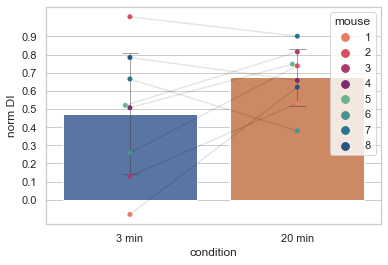

In [109]:
fig, ax = plt.subplots()

print(test_df)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="norm DI", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

sns.swarmplot(x="condition", y="norm DI", hue="mouse", data=df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))
#sns.barplot()
ax.set_yticks(np.arange(0, 1, step=0.1))


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = test_df.iloc[i + 8]["mouse"]
    index = test_df.loc[test_df['mouse'] == mouse].index[0]
    x = [locs1[index ,0], locs2[i, 0]]
    y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    ax.plot(x, y, color="black", alpha=0.1)

#for i in range(locs1.shape[0]):
#    x = [locs1[i, 0], locs2_sorted[i, 0]]
#    y = [locs1[i, 1], locs2_sorted[i, 1]]
#    ax.plot(x, y, color="black", alpha=0.1)

plt.show()

Observation
- No clear correlation between train DI and test DI for 3 min, 20 min or both combined
- Have examples where Test DI is 0.3 but Train DI can range from 0.6-0.9
- Simple calculation of subtraction shifts 3 min DI down to 0.5 but increases variance
- Other methods of normalizing DI?

## Exploration duration vs DI

Text(0.5, 1.0, 'correlation 20 min')

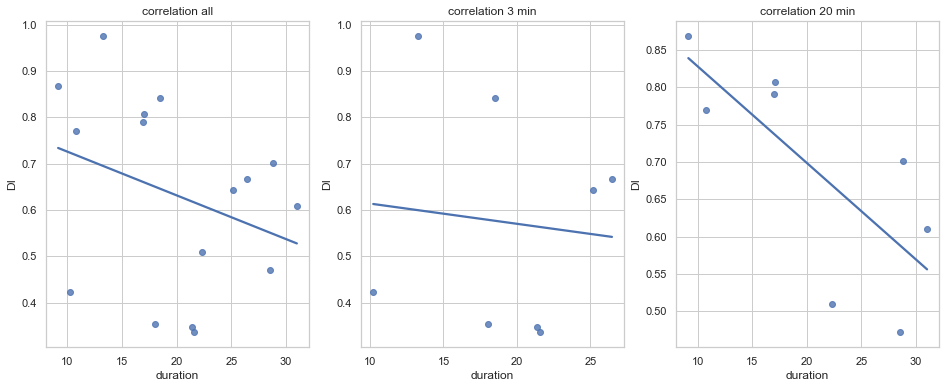

In [130]:
# Plot correlation
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    test_DI = test_desc[file]["DI"]
        
    rows_list.append({"condition": condition, "DI": test_DI, "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "duration": test_desc[file]["total"] / 1000 })

df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

fig, axes = plt.subplots(1,3, figsize=(16, 6))

sns.regplot(x="duration", y="DI", data=df, ax=axes[0], ci=None)
axes[0].set_title("correlation all")
sns.regplot(x="duration", y="DI", data=df[df["condition"] == "3 min"], ax=axes[1], ci=None)
axes[1].set_title("correlation 3 min")

sns.regplot(x="duration", y="DI", data=df[df["condition"] == "20 min"], ax=axes[2], ci=None)
axes[2].set_title("correlation 20 min")

Text(0.5, 1.0, 'correlation 20 min')

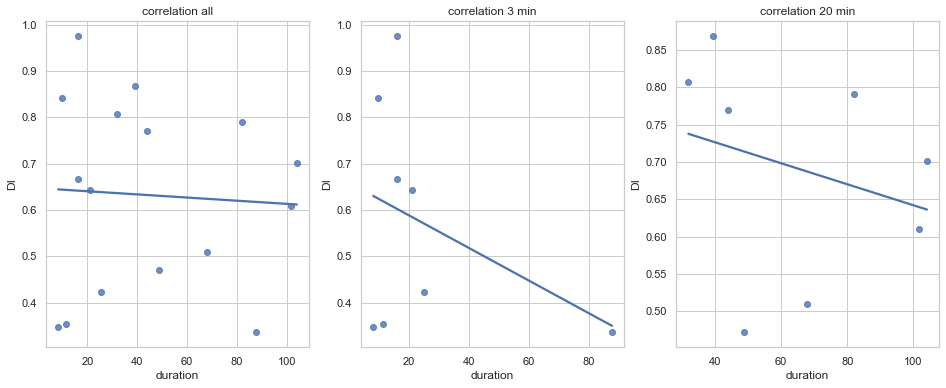

In [131]:
# Plot correlation
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    test_DI = test_desc[file]["DI"]
        
    rows_list.append({"condition": condition, "DI": test_DI, "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "duration": train_desc[test_desc[file]["trial"]]["total"] / 1000 })

df = pd.DataFrame(rows_list)
df = df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

fig, axes = plt.subplots(1,3, figsize=(16, 6))

sns.regplot(x="duration", y="DI", data=df, ax=axes[0], ci=None)
axes[0].set_title("correlation all")
sns.regplot(x="duration", y="DI", data=df[df["condition"] == "3 min"], ax=axes[1], ci=None)
axes[1].set_title("correlation 3 min")

sns.regplot(x="duration", y="DI", data=df[df["condition"] == "20 min"], ax=axes[2], ci=None)
axes[2].set_title("correlation 20 min")

Observations
- Noticable trend where longer Test exploration results in lower DI to around 0.5, animal already familiarized (20 min only but not 3 min)?
- No noticable correlation between train exploration and test result times (except for outlier)

## Temporal order

### 3 min then 20 min

   condition        DI  epoch  batch  mouse
0      3 min  0.335788      1      1      1
1      3 min  0.347046      1      2      6
2      3 min  0.354610      2      1      3
3      3 min  0.422211      1      2      5
4      3 min  0.642948      2      2      7
5      3 min  0.666251      2      2      8
6      3 min  0.841696      2      1      4
7      3 min  0.975845      1      1      2
8     20 min  0.471380      1      2      8
9     20 min  0.509677      2      2      6
10    20 min  0.609825      2      1      1
11    20 min  0.701522      1      1      4
12    20 min  0.770299      1      1      3
13    20 min  0.790566      2      2      5
14    20 min  0.807523      1      2      7
15    20 min  0.868881      2      1      2


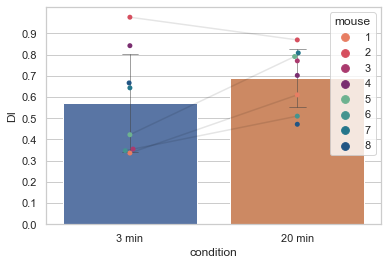

In [135]:
# mouse 1,2, 5,6

rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

test_df = pd.DataFrame(rows_list)
test_df = test_df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


test_df = test_df.reset_index(drop=True)



fig, ax = plt.subplots()

print(test_df)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=test_df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

sns.swarmplot(x="condition", y="DI", hue="mouse", data=test_df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))
#sns.barplot()
ax.set_yticks(np.arange(0, 1, step=0.1))


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = test_df.iloc[i + 8]["mouse"]
    if mouse in [1,2,5,6]:

        index = test_df.loc[test_df['mouse'] == mouse].index[0]
        x = [locs1[index ,0], locs2[i, 0]]
        y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
        ax.plot(x, y, color="black", alpha=0.1)

#for i in range(locs1.shape[0]):
#    x = [locs1[i, 0], locs2_sorted[i, 0]]
#    y = [locs1[i, 1], locs2_sorted[i, 1]]
#    ax.plot(x, y, color="black", alpha=0.1)

plt.show()


<AxesSubplot:xlabel='condition', ylabel='DI'>

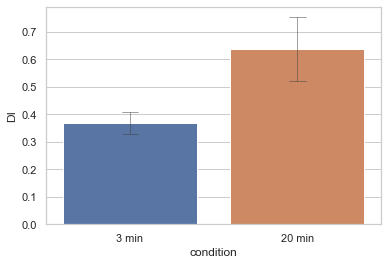

In [141]:
sns.barplot(x="condition", y="DI", data=test_df[(test_df["mouse"] == 1) | (test_df["mouse"] == 1) | (test_df["mouse"] == 5) | (test_df["mouse"] == 6)], errwidth=0.5, capsize=0.1, ci="sd")


### 20 min then 3 min

   condition        DI  epoch  batch  mouse
0      3 min  0.335788      1      1      1
1      3 min  0.347046      1      2      6
2      3 min  0.354610      2      1      3
3      3 min  0.422211      1      2      5
4      3 min  0.642948      2      2      7
5      3 min  0.666251      2      2      8
6      3 min  0.841696      2      1      4
7      3 min  0.975845      1      1      2
8     20 min  0.471380      1      2      8
9     20 min  0.509677      2      2      6
10    20 min  0.609825      2      1      1
11    20 min  0.701522      1      1      4
12    20 min  0.770299      1      1      3
13    20 min  0.790566      2      2      5
14    20 min  0.807523      1      2      7
15    20 min  0.868881      2      1      2


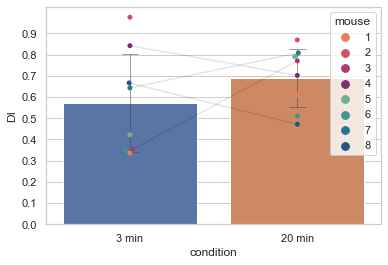

In [136]:
# mouse 1,2, 5,6

rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

test_df = pd.DataFrame(rows_list)
test_df = test_df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


test_df = test_df.reset_index(drop=True)



fig, ax = plt.subplots()

print(test_df)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=test_df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

sns.swarmplot(x="condition", y="DI", hue="mouse", data=test_df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))
#sns.barplot()
ax.set_yticks(np.arange(0, 1, step=0.1))


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = test_df.iloc[i + 8]["mouse"]
    if mouse in [3,4,7,8]:

        index = test_df.loc[test_df['mouse'] == mouse].index[0]
        x = [locs1[index ,0], locs2[i, 0]]
        y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
        ax.plot(x, y, color="black", alpha=0.1)

#for i in range(locs1.shape[0]):
#    x = [locs1[i, 0], locs2_sorted[i, 0]]
#    y = [locs1[i, 1], locs2_sorted[i, 1]]
#    ax.plot(x, y, color="black", alpha=0.1)

plt.show()


## Analysis of quadrants

<AxesSubplot:xlabel='location', ylabel='duration'>

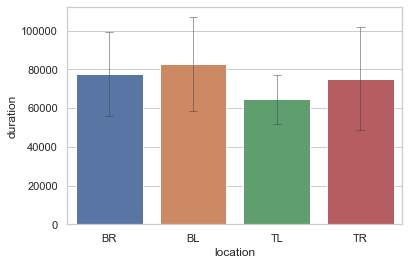

In [171]:
# Quadrant duration
rows_list = []
for file in test_desc:
    
    
    
    for location in test_desc[file]["q_durations"]:
        rows_list.append({"location": location, "duration": test_desc[file]["q_durations"][location], "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.barplot(x="location", y="duration", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

# Bias against TL?


<AxesSubplot:xlabel='location', ylabel='duration'>

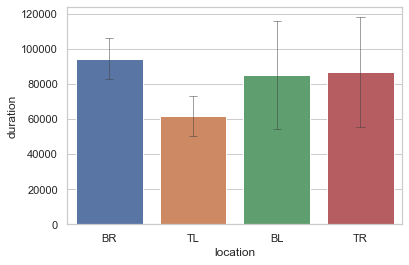

In [175]:
# Bias when no object present
# Quadrant duration
rows_list = []
for file in test_desc:
    
    for location in test_desc[file]["q_durations"]:
        if location == test_desc[file]["old"] or location == test_desc[file]["new"]:
            rows_list.append({"location": location, "duration": test_desc[file]["q_durations"][location], "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.barplot(x="location", y="duration", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

# Bias against TL?

<AxesSubplot:xlabel='location', ylabel='duration'>

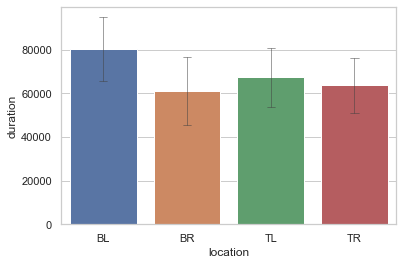

In [174]:
# Bias when no object present
# Quadrant duration
rows_list = []
for file in test_desc:
    
    for location in test_desc[file]["q_durations"]:
        if location != test_desc[file]["old"] and location != test_desc[file]["new"]:
            rows_list.append({"location": location, "duration": test_desc[file]["q_durations"][location], "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["location"], ascending = (True))

sns.set(style="whitegrid")
sns.barplot(x="location", y="duration", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

# Bias against TL?

        0       1       2       3
0   70689   96399   78643   54456
1   70529   56975   70968  101755
2   87448   61460  107801   43502
3   75566   46179   81366   96517
4   69450   75684   96039   58415
5   74409   59616   94524   71011
6   63493   84646  101879   50141
7   52457   56375  102874   88122
8   48095   38139  127933   85517
9   54140   58772   73086  113550
10  45535  152282   16991   85116
11  43104   76568   80128  100239
12  78398   81437   74724   65045
13  68894   89762   52377   88847
14  75406  103956   75605   45380
15  53130   64809   87315   95189


([<matplotlib.axis.XTick at 0x12a900fd0>,
 [Text(0, 0, 'TL'), Text(1, 0, 'TR'), Text(2, 0, 'BL'), Text(3, 0, 'BR')])

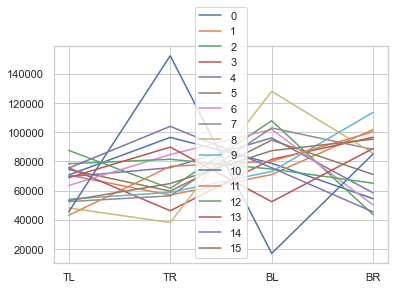

In [121]:

locations = {
    "TL": 1, 
    "TR": 1, 
    "BL": 1, 
    "BR": 1, 
}
rows_list = []
for file in test_desc:        
    rows_list.append([test_desc[file]["q_durations"]["TL"], test_desc[file]["q_durations"]["TR"], test_desc[file]["q_durations"]["BL"], test_desc[file]["q_durations"]["BR"] ])

    #for location in test_desc[file]["q_durations"]:
        
        
df = pd.DataFrame(rows_list)
print(df)

df.T.plot()
plt.xticks([0,1,2,3], ["TL", "TR", "BL", "BR"])

<AxesSubplot:xlabel='location', ylabel='duration'>

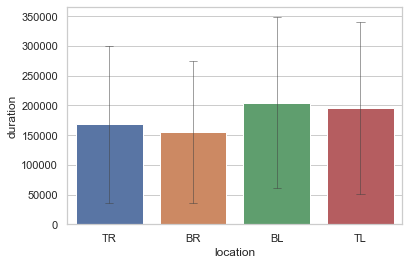

In [228]:
# Quadrant duration
rows_list = []
for file in train_desc:
    if file == "m8t2":
        continue
    for location in train_desc[file]["q_durations"]:
        rows_list.append({"location": location, "duration": train_desc[file]["q_durations"][location], "mouse": int(train_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.barplot(x="location", y="duration", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

# Bias against TL?

<AxesSubplot:xlabel='location', ylabel='duration'>

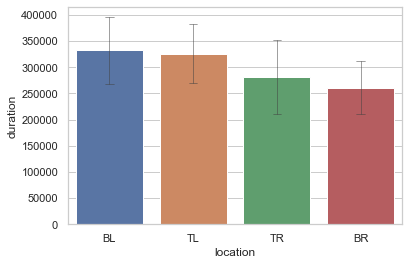

In [229]:
# Quadrant duration
rows_list = []
for file in train_desc:
    if file == "m8t2":
        continue
    if train_desc[file]["condition"] == "short":
        continue
    for location in train_desc[file]["q_durations"]:
        rows_list.append({"location": location, "duration": train_desc[file]["q_durations"][location], "mouse": int(train_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.barplot(x="location", y="duration", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

# Bias against TL?

         0       1       2       3
0    57543   34589   60102   27915
1   268121  225703  432169  273679
2    40662   36066   52501   51058
3   261075  209341  396373  333234
4   448763  192952  321855  236022
5    40224   35504   66409   37703
6   328244  266032  357272  248036
7    27796   34114   70589   47832
8    42944   54776   56493   25507
9   300098  332918  254116  312812
10   69490   46498   41101   22991
11  308928  274949  316286  300140
12  366031  415196  228488  190348
13   57732   28945   63490   29706
14  323801  334443  348995  192585


([<matplotlib.axis.XTick at 0x12c28b2e8>,
 [Text(0, 0, 'TL'), Text(1, 0, 'TR'), Text(2, 0, 'BL'), Text(3, 0, 'BR')])

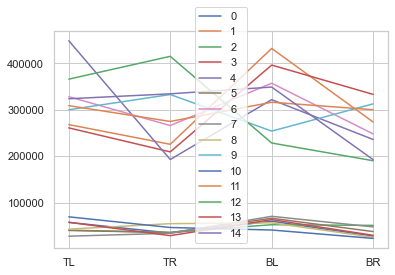

In [227]:
locations = {
    "TL": 1, 
    "TR": 1, 
    "BL": 1, 
    "BR": 1, 
}
rows_list = []
for file in train_desc: 
    if file == "m8t2":
        continue
    rows_list.append([train_desc[file]["q_durations"]["TL"], train_desc[file]["q_durations"]["TR"], train_desc[file]["q_durations"]["BL"], train_desc[file]["q_durations"]["BR"] ])

    #for location in test_desc[file]["q_durations"]:
        
        
df = pd.DataFrame(rows_list)
print(df)

df.T.plot()
plt.xticks([0,1,2,3], ["TL", "TR", "BL", "BR"])

<AxesSubplot:xlabel='location', ylabel='duration'>

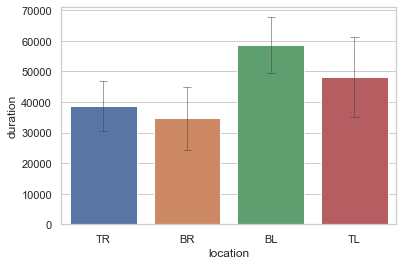

In [230]:
# Quadrant duration
rows_list = []
for file in train_desc:
    if file == "m8t2":
        continue
    if train_desc[file]["condition"] == "long":
        continue
    for location in train_desc[file]["q_durations"]:
        rows_list.append({"location": location, "duration": train_desc[file]["q_durations"][location], "mouse": int(train_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.barplot(x="location", y="duration", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

# Bias against TL?

   location  duration  mouse
19       BR     23350      1
18       TL     13517      1
17       TR      8876      1
16       BL     21629      1
23       TL      2079      2
22       BR     12153      2
21       BL      1559      2
20       TR     33983      2
27       TL     13675      3
26       BR     16232      3
25       BL      4038      3
24       TR     13073      3
31       BR     25148      4
29       BL     14595      4
28       TR     29868      4
30       TL      9315      4
0        TR      9357      5
3        BR     21071      5
2        TL      7154      5
1        BL     10677      5
7        TL     17630      6
6        BR     20991      6
5        BL     19273      6
4        TR     10595      6
11       BR     19632      7
10       TL     13553      7
9        TR     18433      7
8        BL      9916      7
13       TR     20273      8
12       BL     23109      8
14       BR     23990      8
15       TL     12073      8


<AxesSubplot:xlabel='location', ylabel='duration'>

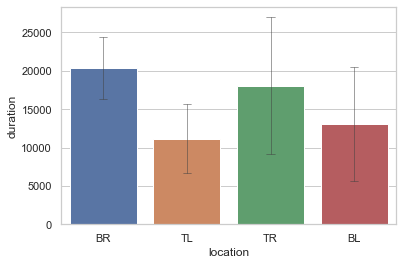

In [25]:
rows_list = []
for file in test_desc:
    
    for location in test_desc[file]["durations"]:
        rows_list.append({"location": location, "duration": np.sum(test_desc[file]["durations"][location]), "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))
print(df)

sns.set(style="whitegrid")
sns.barplot(x="location", y="duration", data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

<AxesSubplot:xlabel='q_duration', ylabel='duration'>

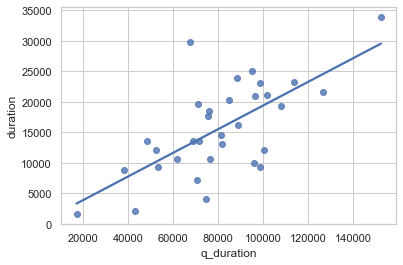

In [26]:
# plot exploration vs duration in quadrant
rows_list = []
for file in test_desc:
    
    for location in test_desc[file]["q_durations"]:
        rows_list.append({"location": location, "q_duration": test_desc[file]["q_durations"][location], "duration": np.sum(test_desc[file]["durations"][location]), "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.regplot(x="q_duration", y="duration", data=df, ci=None)


<AxesSubplot:xlabel='q_DI', ylabel='DI'>

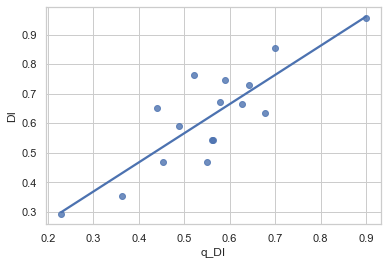

In [177]:
# plot exploration vs duration in quadrant
rows_list = []
for file in test_desc:
    
    #for location in test_desc[file]["q_durations"]:
    q_DI = test_desc[file]["q_durations"][test_desc[file]["new"]]
    q_DI = q_DI / (q_DI + test_desc[file]["q_durations"][test_desc[file]["old"]])
    rows_list.append({"DI": test_desc[file]["DI"], "q_DI": q_DI, "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.regplot(x="q_DI", y="DI", data=df, ci=None)

<AxesSubplot:xlabel='q_DI', ylabel='DI_ratio'>

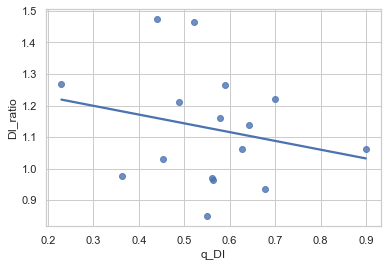

In [179]:
# plot exploration vs duration in quadrant
rows_list = []
for file in test_desc:
    
    #for location in test_desc[file]["q_durations"]:
    q_DI = test_desc[file]["q_durations"][test_desc[file]["new"]]
    q_DI = q_DI / (q_DI + test_desc[file]["q_durations"][test_desc[file]["old"]])
    rows_list.append({"DI_ratio": test_desc[file]["DI"]/q_DI, "q_DI": q_DI, "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.regplot(x="q_DI", y="DI_ratio", data=df, ci=None)

<AxesSubplot:xlabel='q_duration', ylabel='ratio'>

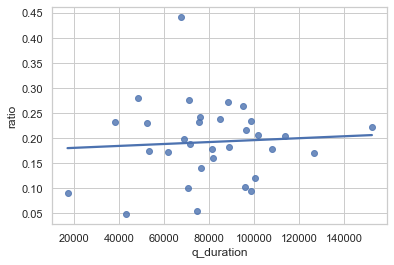

In [34]:
# Calculate ratio of time spent in quadrant vs exploration
rows_list = []
for file in test_desc:
    for location in test_desc[file]["q_durations"]:
        rows_list.append({"location": location, "q_duration": test_desc[file]["q_durations"][location], "ratio": np.sum(test_desc[file]["durations"][location])/test_desc[file]["q_durations"][location], "mouse": int(test_desc[file]["trial"][1])})
    #epoch = int(test_desc[file]["trial"][3])
    #batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    #rows_list.append({"condition": condition, "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

df = pd.DataFrame(rows_list)
df = df.sort_values(["mouse"], ascending = (True))

sns.set(style="whitegrid")
sns.regplot(x="q_duration", y="ratio", data=df, ci=None,)

In [35]:
# Transform to datatable
rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2

    rows_list.append({"condition": condition, "object":"Novel", "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "exploration_ratio": np.sum(test_desc[file]["durations"][test_desc[file]["new"]]) / test_desc[file]["q_durations"][test_desc[file]["new"]]})

    rows_list.append({"condition": condition, "object":"Familiar", "DI": test_desc[file]["DI"], "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1]), "exploration_ratio": np.sum(test_desc[file]["durations"][test_desc[file]["old"]]) / test_desc[file]["q_durations"][test_desc[file]["old"]] })

    
df = pd.DataFrame(rows_list)
df = df.sort_values(["object", "exploration_ratio"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


df = df.reset_index(drop=True)

   condition    object        DI  epoch  batch  mouse  exploration_ratio
30    20 min  Familiar  0.467314      1      2      8           0.234274
29    20 min  Familiar  0.543513      2      2      6           0.233306
31    20 min  Familiar  0.633358      2      1      1           0.280774
20    20 min  Familiar  0.650217      1      2      7           0.103250
25    20 min  Familiar  0.671750      1      1      4           0.179646
19    20 min  Familiar  0.746537      2      2      5           0.101433
17    20 min  Familiar  0.764011      1      1      3           0.054039
16    20 min  Familiar  0.853921      2      1      2           0.048232
10    20 min     Novel  0.467314      1      2      8           0.239503
7     20 min     Novel  0.543513      2      2      6           0.217485
5     20 min     Novel  0.633358      2      1      1           0.205636
11    20 min     Novel  0.650217      1      2      7           0.243552
15    20 min     Novel  0.671750      1      1     

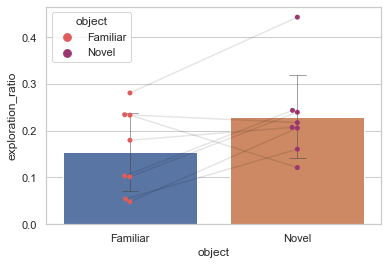

In [37]:
# 20 min
short_df = df.drop(df[df.condition == "3 min"].index)
short_df = short_df.sort_values(["object", "DI"], ascending = (True, True))
print(short_df)
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


short_df = short_df.reset_index(drop=True)

fig, ax = plt.subplots()


sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration_ratio", data=short_df, errwidth=0.5, capsize=0.1, ci="sd", ax=ax)
sns.swarmplot(x="object", y="exploration_ratio",hue="object", data=short_df, palette=sns.color_palette("flare", 2), ax=ax)


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = short_df.iloc[i + 8]["mouse"]
    index = short_df.loc[test_df['mouse'] == mouse].index[0]
    x = [locs1[index ,0], locs2[i, 0]]
    y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    ax.plot(x, y, color="black", alpha=0.1)

   condition    object        DI  epoch  batch  mouse  exploration_ratio
22     3 min  Familiar  0.290969      1      1      1           0.170882
24     3 min  Familiar  0.354727      1      2      6           0.178783
21     3 min  Familiar  0.467056      1      2      5           0.139890
27     3 min  Familiar  0.542749      2      1      3           0.198493
26     3 min  Familiar  0.591593      2      2      7           0.189579
28     3 min  Familiar  0.665225      2      2      8           0.230150
23     3 min  Familiar  0.729710      2      1      4           0.175325
18     3 min  Familiar  0.956136      1      1      2           0.091754
9      3 min     Novel  0.290969      1      1      1           0.232728
3      3 min     Novel  0.354727      1      2      6           0.172389
0      3 min     Novel  0.467056      1      2      5           0.094785
4      3 min     Novel  0.542749      2      1      3           0.182696
14     3 min     Novel  0.591593      2      2     

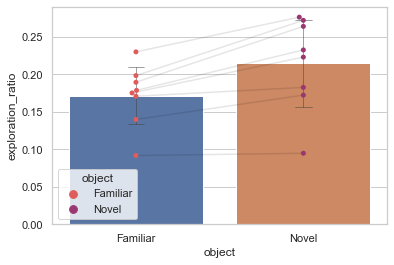

In [38]:
# 20 min
short_df = df.drop(df[df.condition == "20 min"].index)
short_df = short_df.sort_values(["object", "DI"], ascending = (True, True))
print(short_df)
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


short_df = short_df.reset_index(drop=True)

fig, ax = plt.subplots()


sns.set(style="whitegrid")
sns.barplot(x="object", y="exploration_ratio", data=short_df, errwidth=0.5, capsize=0.1, ci="sd", ax=ax)
sns.swarmplot(x="object", y="exploration_ratio",hue="object", data=short_df, palette=sns.color_palette("flare", 2), ax=ax)


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = short_df.iloc[i + 8]["mouse"]
    index = short_df.loc[test_df['mouse'] == mouse].index[0]
    x = [locs1[index ,0], locs2[i, 0]]
    y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    ax.plot(x, y, color="black", alpha=0.1)

   condition        DI  epoch  batch  mouse
0      3 min  0.416892      1      2      5
1      3 min  0.479279      2      1      3
2      3 min  0.490895      1      2      6
3      3 min  0.541886      2      2      8
4      3 min  0.579223      1      1      1
5      3 min  0.601095      2      1      4
6      3 min  0.602836      2      2      7
7      3 min  0.708635      1      1      2
8     20 min  0.451646      2      1      1
9     20 min  0.482452      2      2      6
10    20 min  0.513591      1      2      8
11    20 min  0.598126      1      1      4
12    20 min  0.671214      2      2      5
13    20 min  0.702280      1      2      7
14    20 min  0.715398      2      1      2
15    20 min  0.748150      1      1      3


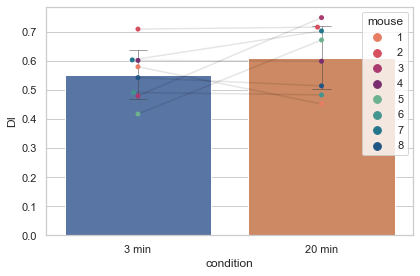

In [231]:
# sort short and long

rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    tn = np.sum(test_desc[file]["durations"][test_desc[file]["new"]]) / test_desc[file]["q_durations"][test_desc[file]["new"]]
    tf = np.sum(test_desc[file]["durations"][test_desc[file]["old"]]) / test_desc[file]["q_durations"][test_desc[file]["old"]]
    DI = tn / (tn + tf)
    rows_list.append({"condition": condition, "DI": DI, "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

test_df = pd.DataFrame(rows_list)
test_df = test_df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


test_df = test_df.reset_index(drop=True)



fig, ax = plt.subplots()

print(test_df)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=test_df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

sns.swarmplot(x="condition", y="DI", hue="mouse", data=test_df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))
#sns.barplot()
ax.set_yticks(np.arange(0, 1, step=0.1))


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = test_df.iloc[i + 8]["mouse"]
    #if mouse in [3,4,7,8]:
    #    continue
    index = test_df.loc[test_df['mouse'] == mouse].index[0]
    x = [locs1[index ,0], locs2[i, 0]]
    y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    ax.plot(x, y, color="black", alpha=0.1)

#for i in range(locs1.shape[0]):
#    x = [locs1[i, 0], locs2_sorted[i, 0]]
#    y = [locs1[i, 1], locs2_sorted[i, 1]]
#    ax.plot(x, y, color="black", alpha=0.1)

#plt.show()
fig.tight_layout()
plt.savefig('output.png', dpi=300)

In [184]:
short = test_df[test_df["condition"] == "3 min"].iloc[:,1].tolist()
long = test_df[test_df["condition"] == "20 min"].iloc[:,1].tolist()

print(stats.ttest_ind(short, long))
print(stats.ttest_1samp(short, 0.5))
print(stats.ttest_1samp(long, 0.5))

Ttest_indResult(statistic=-1.1128484160380165, pvalue=0.2845172016486516)
Ttest_1sampResult(statistic=1.6392111522296662, pvalue=0.14517777584091238)
Ttest_1sampResult(statistic=2.704596657240258, pvalue=0.030435941818789107)


   condition        DI  epoch  batch  mouse
0      3 min  0.229653      1      1      1
1      3 min  0.363108      1      2      6
2      3 min  0.488317      2      2      7
3      3 min  0.550719      1      2      5
4      3 min  0.563246      2      1      3
5      3 min  0.626850      2      2      8
6      3 min  0.641786      2      1      4
7      3 min  0.899624      1      1      2
8     20 min  0.440733      1      2      7
9     20 min  0.453805      1      2      8
10    20 min  0.521494      1      1      3
11    20 min  0.560875      2      2      6
12    20 min  0.578945      1      1      4
13    20 min  0.590624      2      2      5
14    20 min  0.677142      2      1      1
15    20 min  0.699295      2      1      2


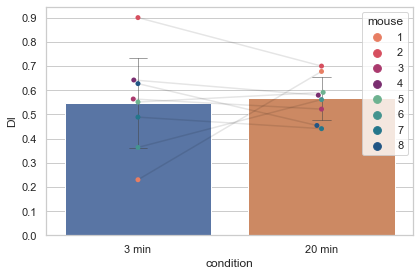

In [181]:
# sort short and long

rows_list = []
for file in test_desc:
    
    epoch = int(test_desc[file]["trial"][3])
    condition = "3 min" if test_desc[file]["condition"] == "short" else "20 min"
    batch = 1 if int(test_desc[file]["trial"][1]) < 5 else 2
    tn = test_desc[file]["q_durations"][test_desc[file]["new"]]
    tf = test_desc[file]["q_durations"][test_desc[file]["old"]]
    DI = tn / (tn + tf)
    rows_list.append({"condition": condition, "DI": DI, "epoch": epoch, "batch": batch, "mouse": int(test_desc[file]["trial"][1])})

test_df = pd.DataFrame(rows_list)
test_df = test_df.sort_values(["condition", "DI"], ascending = (False, True))
#test_df = test_df.drop(test_df[test_df.mouse == 4].index)
#test_df = test_df.drop(test_df[test_df.mouse == 8].index)


test_df = test_df.reset_index(drop=True)



fig, ax = plt.subplots()

print(test_df)
sns.set(style="whitegrid")
sns.barplot(x="condition", y="DI", data=test_df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

sns.swarmplot(x="condition", y="DI", hue="mouse", data=test_df, ax=ax, palette=sns.color_palette("flare", 4) + sns.color_palette("crest", 4))
#sns.barplot()
ax.set_yticks(np.arange(0, 1, step=0.1))


idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()


for i in range(locs1.shape[0]):
    
    # find locs1
    mouse = test_df.iloc[i + 8]["mouse"]
    index = test_df.loc[test_df['mouse'] == mouse].index[0]
    x = [locs1[index ,0], locs2[i, 0]]
    y = [locs1[index ,1], locs2[i, 1]]
    #if i == 7:
       # ax.plot(x, y, color="green", alpha=0.5)
    #elif i > 4:
        #ax.plot(x, y, color="orange", alpha=0.5)
    #else:
    ax.plot(x, y, color="black", alpha=0.1)

#for i in range(locs1.shape[0]):
#    x = [locs1[i, 0], locs2_sorted[i, 0]]
#    y = [locs1[i, 1], locs2_sorted[i, 1]]
#    ax.plot(x, y, color="black", alpha=0.1)

#plt.show()
fig.tight_layout()
plt.savefig('output.png', dpi=300)

## DI over time

In [143]:
timeframes = [1 * 60 * 1000, 2 * 60 * 1000, 3 * 60 * 1000, 4 * 60 * 1000, 5* 60 * 1000]
DI_timeframe = []
# only count times that end within time
for time in timeframes:
    
    
    DIs = []
    for file in test_desc:
        old = 0
        new = 0
        if test_desc[file]["condition"] == "short":
            continue
        for exploration in test_desc[file]["timestamps"][test_desc[file]["old"]]:
            if exploration[1] > time:
                break
            if exploration[1] - exploration[0] > 500:

                old += exploration[1] - exploration[0]
        for exploration in test_desc[file]["timestamps"][test_desc[file]["new"]]:
            if exploration[1] > time:
                break
            if exploration[1] - exploration[0] > 500:

                new += exploration[1] - exploration[0]
        
        if new + old == 0:
            DIs.append(1)
        else:
            DIs.append(new / (new + old))
    DI_timeframe.append(DIs)

In [144]:
df = pd.DataFrame(np.transpose(DI_timeframe), columns=[1,2,3,4,5])

In [145]:
df

,1,2,3,4,5
0,0.750039,0.628456,0.728503,0.677025,0.749711
1,0.268757,0.424185,0.464134,0.475168,0.544884
2,0.000000,0.476445,0.572917,0.623853,0.652459
3,0.352973,0.429424,0.490227,0.443383,0.462901
4,0.922179,0.699378,0.564702,0.580026,0.648977
5,0.835197,0.863950,0.863950,0.863950,0.863950
6,0.783644,0.786124,0.807327,0.778636,0.778636
7,0.639118,0.665024,0.558633,0.595875,0.684744


<AxesSubplot:>

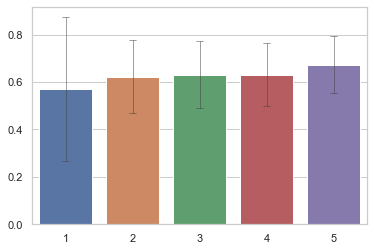

In [146]:
sns.set(style="whitegrid")
sns.barplot(data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

<AxesSubplot:>

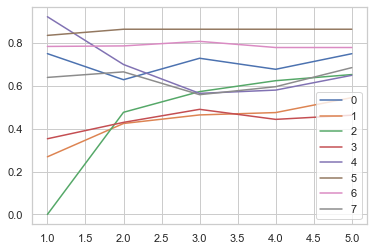

In [147]:
df.T.plot()

In [153]:
timeframes = [1 * 60 * 1000, 2 * 60 * 1000, 3 * 60 * 1000, 4 * 60 * 1000, 5* 60 * 1000]
DI_timeframe = []
# only count times that end within time
for time in timeframes:
    
    
    DIs = []
    for file in test_desc:
        old = 0
        new = 0
        if test_desc[file]["condition"] == "long":
            continue
        for exploration in test_desc[file]["timestamps"][test_desc[file]["old"]]:
            if exploration[1] > time:
                break
                
            if exploration[1] - exploration[0] > 500:
                old += exploration[1] - exploration[0]
        for exploration in test_desc[file]["timestamps"][test_desc[file]["new"]]:
            if exploration[1] > time:
                break
            if exploration[1] - exploration[0] > 500:
                new += exploration[1] - exploration[0]
        
        if new + old == 0:
            DIs.append(1)
        else:
            DIs.append(new / (new + old))
    DI_timeframe.append(DIs)

In [154]:
df = pd.DataFrame(np.transpose(DI_timeframe), columns=[1,2,3,4,5])

In [155]:
df

,1,2,3,4,5
0,0.000000,0.360811,0.271009,0.405030,0.401460
1,0.054184,0.132573,0.324296,0.342084,0.345991
2,0.437195,0.498181,0.654914,0.644058,0.606076
3,0.861649,0.650469,0.679419,0.665149,0.653702
4,0.441768,0.475691,0.400036,0.359833,0.295620
5,1.000000,0.860806,0.878713,0.931126,0.962295
6,0.734323,0.574077,0.438887,0.462488,0.535554
7,0.571563,0.879535,0.735122,0.713673,0.754978


<AxesSubplot:>

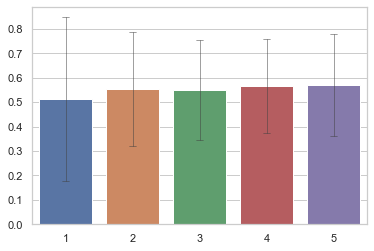

In [156]:
sns.set(style="whitegrid")
sns.barplot(data=df, errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")

<AxesSubplot:>

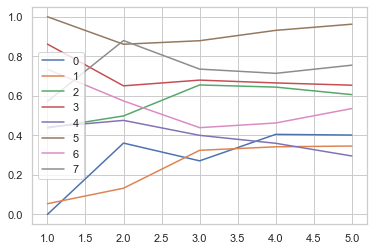

In [157]:
df.T.plot()

## Exploration over time

<AxesSubplot:>

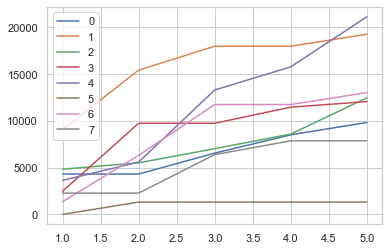

In [170]:
timeframes = [1 * 60 * 1000, 2 * 60 * 1000, 3 * 60 * 1000, 4 * 60 * 1000, 5* 60 * 1000]
DI_timeframe = []
# only count times that end within time
for time in timeframes:
    
    
    DIs = []
    for file in test_desc:
        old = 0
        new = 0
        if test_desc[file]["condition"] == "long":
            continue
        #if test_desc[file]["old"] == "TL":
        #    continue
        for exploration in test_desc[file]["timestamps"][test_desc[file]["old"]]:
            if exploration[1] > time:
                break
                
            if exploration[1] - exploration[0] > 500:
                old += exploration[1] - exploration[0]
        for exploration in test_desc[file]["timestamps"][test_desc[file]["new"]]:
            if exploration[1] > time:
                break
            if exploration[1] - exploration[0] > 500:
                new = exploration[1] - exploration[0]
        DIs.append(old)
        
    DI_timeframe.append(DIs)
    
df = pd.DataFrame(np.transpose(DI_timeframe), columns=[1,2,3,4,5])
df.T.plot() 

<AxesSubplot:>

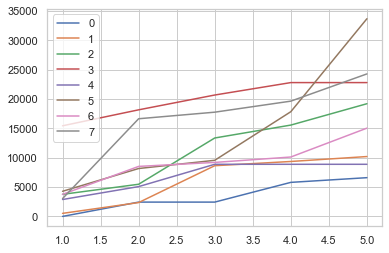

In [169]:
timeframes = [1 * 60 * 1000, 2 * 60 * 1000, 3 * 60 * 1000, 4 * 60 * 1000, 5* 60 * 1000]
DI_timeframe = []
# only count times that end within time
for time in timeframes:
    
    
    DIs = []
    for file in test_desc:
        old = 0
        new = 0
        if test_desc[file]["condition"] == "long":
            continue
        #if test_desc[file]["old"] == "TL":
        #    continue
        for exploration in test_desc[file]["timestamps"][test_desc[file]["old"]]:
            if exploration[1] > time:
                break
                
            if exploration[1] - exploration[0] > 500:
                old += exploration[1] - exploration[0]
        for exploration in test_desc[file]["timestamps"][test_desc[file]["new"]]:
            if exploration[1] > time:
                break
            if exploration[1] - exploration[0] > 500:
                new += exploration[1] - exploration[0]
        DIs.append(new)
        
    DI_timeframe.append(DIs)
    
df = pd.DataFrame(np.transpose(DI_timeframe), columns=[1,2,3,4,5])
df.T.plot() 

In [166]:
timeframes = [1 * 60 * 1000, 2 * 60 * 1000, 3 * 60 * 1000, 4 * 60 * 1000, 5* 60 * 1000]
DI_timeframe = []
# only count times that end within time
for time in timeframes:
    
    
    DIs = []
    for file in test_desc:
        old = 0
        new = 0
        if test_desc[file]["condition"] == "short":
            continue
        #if test_desc[file]["old"] == "TL":
        #    continue
        for exploration in test_desc[file]["timestamps"][test_desc[file]["old"]]:
            if exploration[1] > time:
                break
                
            if exploration[1] - exploration[0] > 500:
                old += exploration[1] - exploration[0]
        for exploration in test_desc[file]["timestamps"][test_desc[file]["new"]]:
            if exploration[1] > time:
                break
            if exploration[1] - exploration[0] > 500:
                new = exploration[1] - exploration[0]
        DIs.append(old)
        
    DI_timeframe.append(DIs)
    
df = pd.DataFrame(np.transpose(DI_timeframe), columns=[1,2,3,4,5])

<AxesSubplot:>

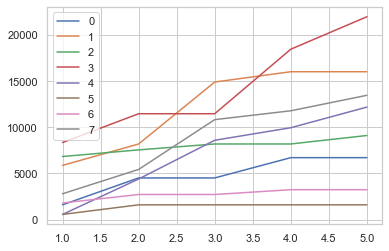

In [167]:
df.T.plot() # Long

# OLD

In [39]:
# sort short and long
test_disc_short = [test_desc[file]["d"] for file in test_desc if test_desc[file]["condition"] == "short"]
test_disc_long = [test_desc[file]["d"] for file in test_desc if test_desc[file]["condition"] == "long"]

print(stats.ttest_ind(test_disc_short, test_disc_long))
print(stats.mannwhitneyu(test_disc_short, test_disc_long, method="exact"))
# NOT SIGNIFICANT

Ttest_indResult(statistic=-1.614728418298097, pvalue=0.12867440289897164)
MannwhitneyuResult(statistic=19.0, pvalue=0.19487179487179485)


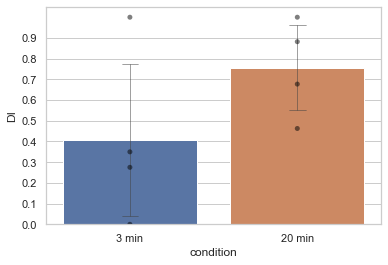

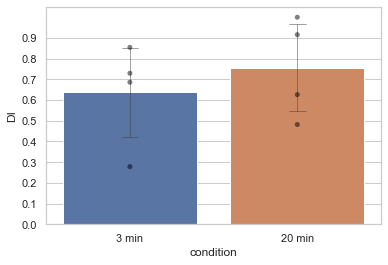

In [37]:
sns.set(style="whitegrid")

sns.barplot(x="condition", y="DI", data=test_df[test_df["epoch"] == 1], errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df[test_df["epoch"] == 1], color="0", alpha=0.5)
plt.yticks(np.arange(0, 1, step=0.1))

plt.show()

sns.set(style="whitegrid")

sns.barplot(x="condition", y="DI", data=test_df[test_df["epoch"] == 2], errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df[test_df["epoch"] == 2], color="0", alpha=0.5)
plt.yticks(np.arange(0, 1, step=0.1))

plt.show()

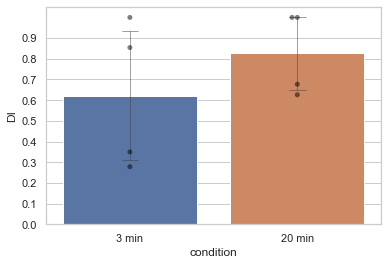

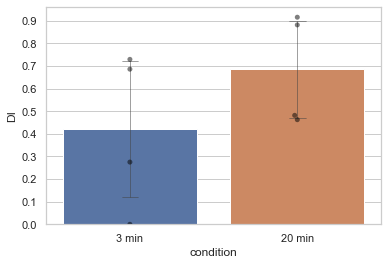

In [38]:
#print(test_df)
sns.set(style="whitegrid")

sns.barplot(x="condition", y="DI", data=test_df[test_df["batch"] == 1], errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df[test_df["batch"] == 1], color="0", alpha=0.5)
plt.yticks(np.arange(0, 1, step=0.1))

plt.show()

sns.set(style="whitegrid")

sns.barplot(x="condition", y="DI", data=test_df[test_df["batch"] == 2], errwidth=0.5, capsize=0.1, ci="sd")#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df[test_df["batch"] == 2], color="0", alpha=0.5)
plt.yticks(np.arange(0, 1, step=0.1))

plt.show()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


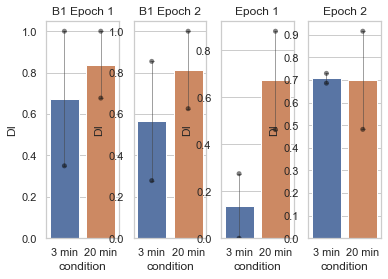

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=4)
print(ax)

sns.set(style="whitegrid")

sns.barplot(x="condition", y="DI", data=test_df.query("batch == 1 & epoch == 1"), errwidth=0.5, capsize=0.1, ci="sd", ax=ax[0])#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df.query("batch == 1 & epoch == 1"), color="0", alpha=0.5, ax=ax[0])
#plt.yticks(np.arange(0, 1, step=0.1))
ax[0].set_title("B1 Epoch 1")

#plt.show()


sns.barplot(x="condition", y="DI", data=test_df.query("batch == 1 & epoch == 2"), errwidth=0.5, capsize=0.1, ci="sd", ax=ax[1])#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df.query("batch == 1 & epoch == 2"), color="0", alpha=0.5, ax=ax[1])
plt.yticks(np.arange(0, 1, step=0.1))
ax[1].set_title("B1 Epoch 2")


sns.barplot(x="condition", y="DI", data=test_df.query("batch == 2 & epoch == 1"), errwidth=0.5, capsize=0.1, ci="sd", ax=ax[2])#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df.query("batch == 2 & epoch == 1"), color="0", alpha=0.5, ax=ax[2])
plt.yticks(np.arange(0, 1, step=0.1))
ax[2].set_title("Epoch 1")

#plt.show()


sns.barplot(x="condition", y="DI", data=test_df.query("batch == 2 & epoch == 2"), errwidth=0.5, capsize=0.1, ci="sd", ax=ax[3])#, ci="sd")
sns.swarmplot(x="condition", y="DI", data=test_df.query("batch == 2 & epoch == 2"), color="0", alpha=0.5, ax=ax[3])
plt.yticks(np.arange(0, 1, step=0.1))
ax[3].set_title("Epoch 2")
plt.show()
#fig.tight_layout()
#plt.savefig('output.png', dpi=300)

In [ ]:
# Distribution of exploration of new and old
sns.histplot 

# Train-Test analysis

## Discrimination index correlation plot

In [166]:
# Get (x,y) positions 
disc_corr_short = []
disc_corr_long = []

for file in test_desc:
    trial = test_desc[file]["trial"]
    if test_desc[file]["condition"] == "short":
        disc_corr_short.append((train_desc[trial]["d"], test_desc[file]["d"]))
    else:
        disc_corr_long.append((train_desc[trial]["d"], test_desc[file]["d"]))


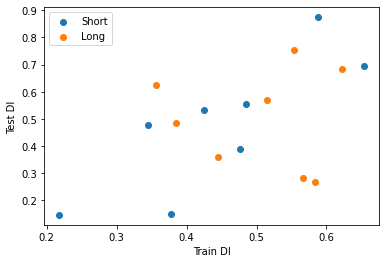

In [167]:
# plot short correlation and long correlation different colors
points = list(zip(*disc_corr_short))
plt.scatter(points[0], points[1])
points = list(zip(*disc_corr_long))
plt.scatter(points[0], points[1])
plt.xlabel("Train DI")
plt.ylabel("Test DI")
plt.legend(["Short", "Long"])

## Exploration ratio correlation plot

In [168]:
# Get (x,y) positions 
expl_corr_short = []
expl_corr_long = []

for file in test_desc:
    trial = test_desc[file]["trial"]
    if test_desc[file]["condition"] == "short":
        expl_corr_short.append((train_desc[trial]["exp_ratio"], test_desc[file]["exp_ratio"]))
    else:
        expl_corr_long.append((train_desc[trial]["exp_ratio"], test_desc[file]["exp_ratio"]))

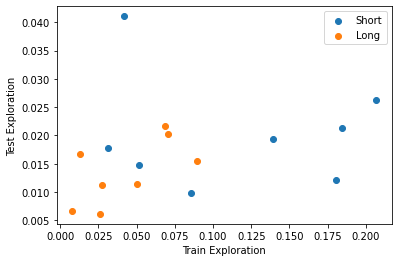

In [169]:
# plot short correlation and long correlation different colors
points = list(zip(*expl_corr_short))
plt.scatter(points[0], points[1])
points = list(zip(*expl_corr_long))
plt.scatter(points[0], points[1])
plt.xlabel("Train Exploration")
plt.ylabel("Test Exploration")
plt.legend(["Short", "Long"])

## Discrimination to exploration correlation plot

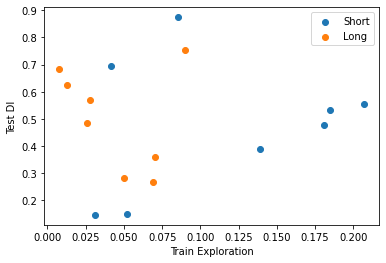

In [170]:
# plot train exploration to test DI
train = list(zip(*expl_corr_short))[0]
test = list(zip(*disc_corr_short))[1]

plt.scatter(train, test)
train = list(zip(*expl_corr_long))[0]
test = list(zip(*disc_corr_long))[1]
plt.scatter(train, test)
plt.xlabel("Train Exploration")
plt.ylabel("Test DI")
plt.legend(["Short", "Long"])

In [171]:
# Eliminate when train exploration too low
thresh = 0.075
thresh_short = []
thresh_long = []

for file in test_desc:
    trial = test_desc[file]["trial"]
    if train_desc[trial]["exp_ratio"] > 0.075:
        
        if test_desc[file]["condition"] == "short":
            thresh_short.append(test_desc[file]["d"])
        else:
            thresh_long.append(test_desc[file]["d"])

<BarContainer object of 2 artists>

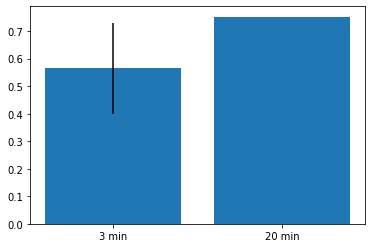

In [172]:
plt.bar(["3 min","20 min"], [np.mean(thresh_short), np.mean(thresh_long)], yerr=[np.std(thresh_short), np.std(thresh_long)])

In [56]:
stats.ttest_ind(thresh_short, thresh_long)
# NOT SIGNIFICANT

Ttest_indResult(statistic=-1.2976907560263318, pvalue=0.2851629686937127)

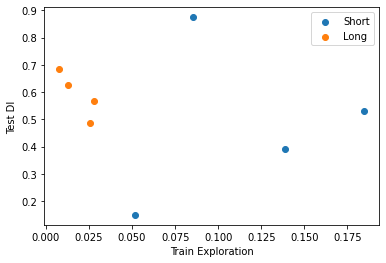

In [174]:
# Get (x,y) positions 
disc_corr_short = []
disc_corr_long = []

for file in test_desc:
    trial = test_desc[file]["trial"]
    if int(test_desc[file]["trial"][1]) > 4:
        if test_desc[file]["condition"] == "short":
            disc_corr_short.append((train_desc[trial]["d"], test_desc[file]["d"]))
        else:
            disc_corr_long.append((train_desc[trial]["d"], test_desc[file]["d"]))

# Get (x,y) positions 
expl_corr_short = []
expl_corr_long = []

for file in test_desc:
    trial = test_desc[file]["trial"]
    if int(test_desc[file]["trial"][1]) > 4:

        if test_desc[file]["condition"] == "short":
            expl_corr_short.append((train_desc[trial]["exp_ratio"], test_desc[file]["exp_ratio"]))
        else:
            expl_corr_long.append((train_desc[trial]["exp_ratio"], test_desc[file]["exp_ratio"]))
        
# plot train exploration to test DI
train = list(zip(*expl_corr_short))[0]
test = list(zip(*disc_corr_short))[1]

plt.scatter(train, test)
train = list(zip(*expl_corr_long))[0]
test = list(zip(*disc_corr_long))[1]
plt.scatter(train, test)
plt.xlabel("Train Exploration")
plt.ylabel("Test DI")
plt.legend(["Short", "Long"])